In [ ]:
# !pip3 install label-studio


Luego, poner en terminal

```bash
label-studio start
```

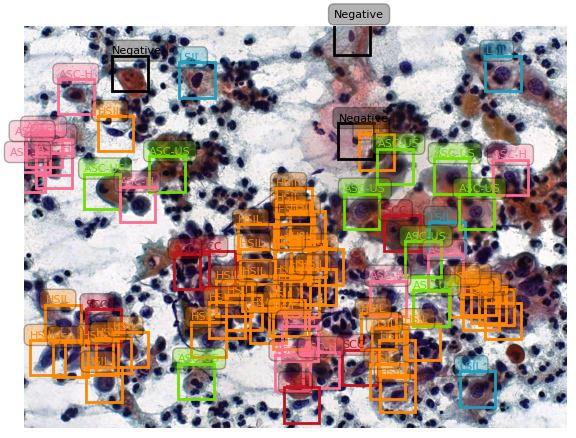

77


In [118]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image

# Cargar las imágenes desde el directorio
image_directory = "base"
images = []

for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = Image.open(os.path.join(image_directory, filename))
        images.append((filename, img))

# Cargar los bounding boxes desde el archivo JSON
with open('classificationDownload/classifications.json', 'r') as file:
    bounding_boxes = json.load(file)

# Diccionario de colores para clases
class_colors = {
    'SCC': '#c1121f',  # Rojo
    'ASC-US': '#70e000',  # Verde
    'LSIL': '#219ebc',  # Celeste
    'HSIL': '#ff8800',  # Naranja
    'ASC-H': '#fb6f92',  # Rosa
    'Negative for intraepithelial lesion': '#0d3b66',  # Azul Oscuro
}

# Función para ajustar el nombre de la clase "Negative for intraepithelial lesion" a "Negative"
def adjust_class_name(bethesda_system):
    if bethesda_system == 'Negative for intraepithelial lesion':
        return 'Negative'
    return bethesda_system

# Función para dibujar bounding boxes de tamaño fijo 90x90 píxeles con colores específicos
def draw_fixed_bounding_boxes(img, classifications):
    fig, ax = plt.subplots(1, figsize=(7, 6))
    ax.imshow(img)
    
    rect_width, rect_height = 90, 90  # Tamaño fijo del bounding box (90x90 píxeles)
    cant = 0

    for classification in classifications:
        cant += 1
        x_center = classification['nucleus_x']
        y_center = classification['nucleus_y']
        bethesda_system = adjust_class_name(classification['bethesda_system'])  # Ajustar nombre de clase
        
        # Calcular la esquina superior izquierda del bounding box
        x = x_center - rect_width / 2
        y = y_center - rect_height / 2
        
        # Obtener el color para la clase bethesda_system
        color = class_colors.get(bethesda_system, 'black')  # Usa 'black' si la clase no tiene color asignado
        
        # Dibujar el bounding box en la imagen
        rect = plt.Rectangle((x, y), rect_width, rect_height, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        
        # Etiquetar el bounding box solo con la clase
        label = bethesda_system  # Solo mostrar la clase
        ax.text(x, y - 5, label, color=color, fontsize=8, bbox=dict(facecolor=color, alpha=0.3, pad=1, boxstyle='round,pad=0.5'))

    plt.axis('off')
    plt.show()
    print(cant)

# Aplicar la función a la imagen correspondiente
for image_name, img in images:
    if image_name == '6bb20c67c4013e8805d0f64315b9bcb1.png':
        # Buscar las clasificaciones correspondientes a la imagen
        for entry in bounding_boxes:
            if entry['image_name'] == image_name:
                classifications = entry['classifications']
                draw_fixed_bounding_boxes(img, classifications)
                break
